In [1]:
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [2]:
import numpy as np
from numpy import random as rng
import math

from matplotlib import pyplot as plt 

import torch

In [3]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

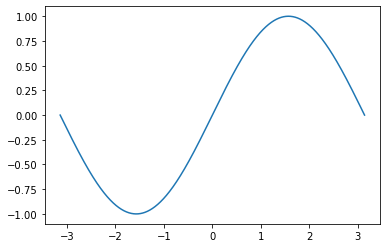

In [4]:
plt.plot(x,y)

---

$$
y = 
a + b x + c x^2 + d x^3 =
\begin{bmatrix} 1 & x & x^2 & x^3 \end{bmatrix} \cdot 
\begin{bmatrix} a \cr b \cr c \cr d \end{bmatrix} 
$$

In [5]:
class Polynomial3(torch.nn.Module):
    
    def __init__(self,p=3):
        super().__init__()
        self.linear = torch.nn.Linear(p, 1)
        self.flatten = torch.nn.Flatten(0,1)
        # [1,2,3,...]
        self.pow = torch.tensor( list(range(1,p+1)), requires_grad=False) 
            
    def polynomial_features(self,x):
        return x.unsqueeze(-1).pow( self.pow )
                
    def forward(self, x):
        # tensor (x, x^2, x^3).
        out = self.polynomial_features(x)
        out = self.linear( out)
        out = self.flatten(out)
        return out


In [6]:
# Construct our model by instantiating the class defined above
model = Polynomial3()

In [7]:
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

In [8]:
%%time

err_hist = []

for t in range(2000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)
    # Compute and print loss
    loss = criterion(y_pred, y)
    err_hist.append( loss.item() )   
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

CPU times: user 2.11 s, sys: 26.8 ms, total: 2.14 s
Wall time: 596 ms


In [9]:
# err_hist

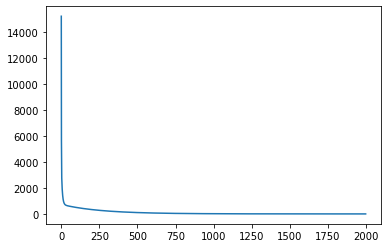

In [10]:
plt.plot(err_hist[1:])

----

In [11]:
with torch.no_grad(): y_pred = model(x)    

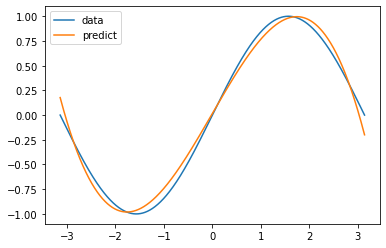

In [12]:
plt.plot(x,y,label='data')
plt.plot(x,y_pred,label='predict')
plt.legend()